In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
import cv2 as cv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path='/content/drive/MyDrive/CVPR/Animals'

In [4]:
catagories=[]
for c in os.listdir(data_path):
  catagories.append(c)
print(catagories)

['Cheetah', 'Jaguar', 'Leopard', 'Lion', 'Tiger']


In [5]:
test_data=[]
for c in catagories:
  path=os.path.join(data_path,c)
  label=catagories.index(c)
  for img in tqdm(os.listdir(path)):
    try:
        img_arr = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE)
        img_arr = cv.resize(img_arr, (256, 256),interpolation=cv.INTER_AREA)
        test_data.append([img_arr, label])
    except Exception as e:
            pass
print(len(test_data))

100%|██████████| 39/39 [00:06<00:00,  5.76it/s]

170


In [6]:
import random
random.shuffle(test_data)

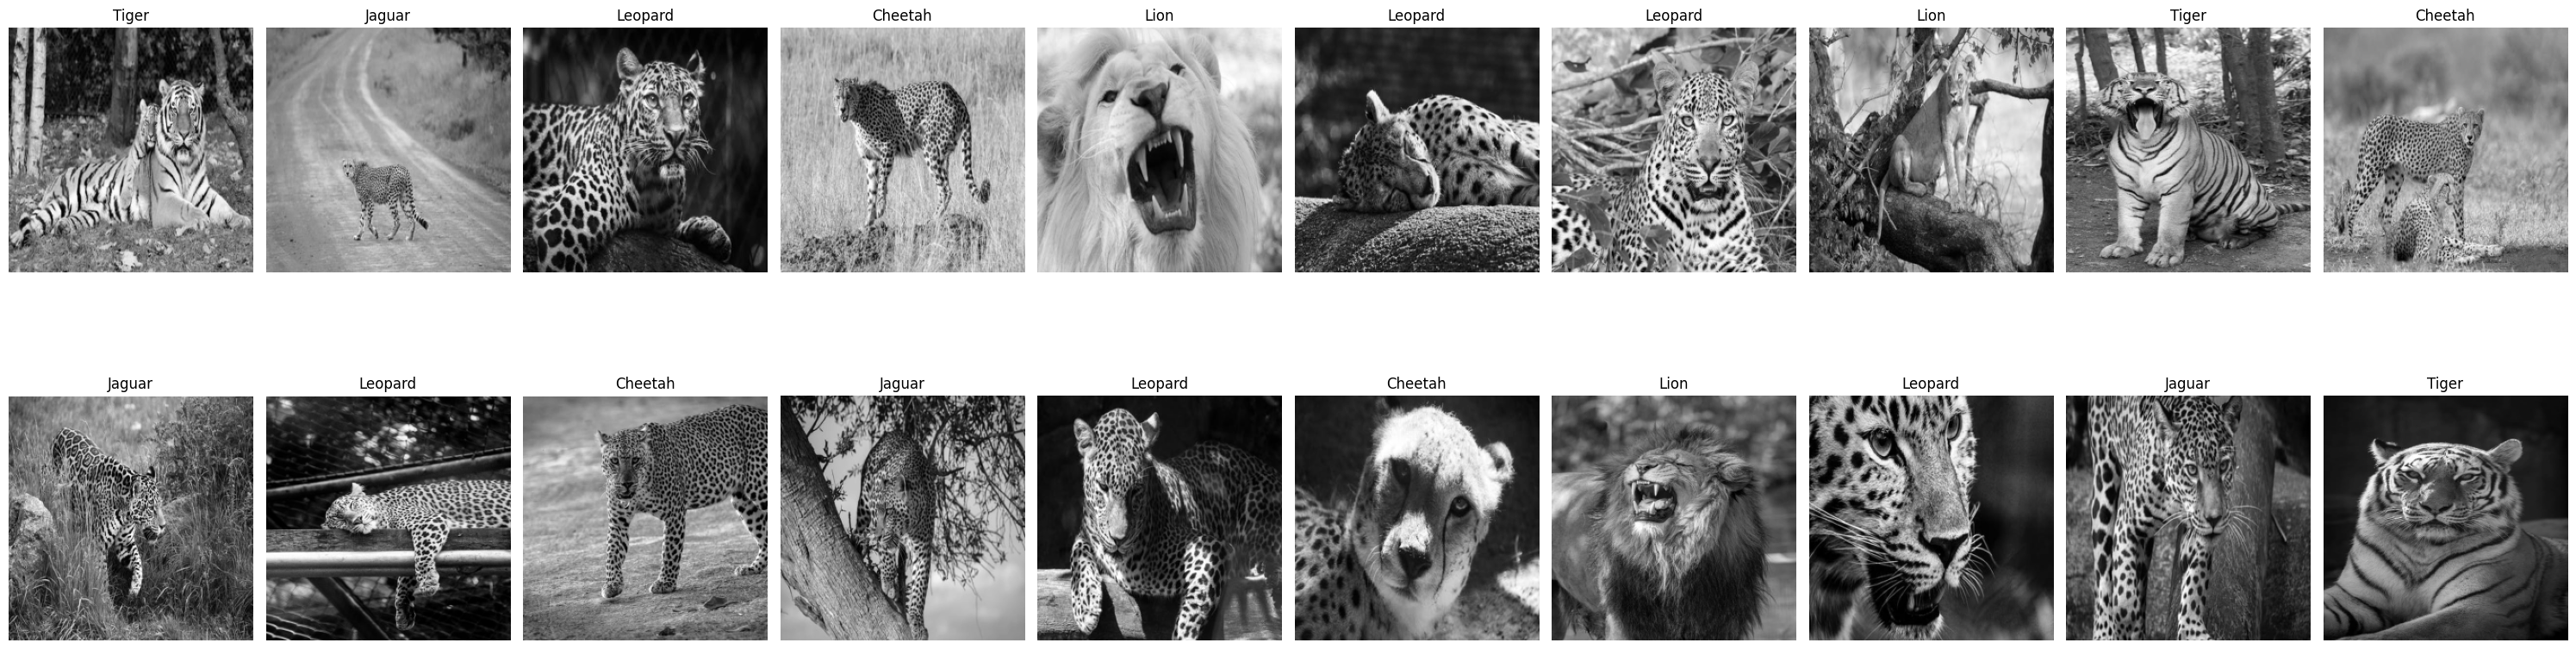

In [13]:
plt.figure(figsize=(30,10))
for i in range(20):
  plt.subplot(2,10,i+1)
  plt.imshow(test_data[i][0],cmap='gray')
  plt.title(catagories[test_data[i][1]])
  plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [15]:
from collections import Counter
def knn(train_data, k_values):
    accuracies = []

    for k in tqdm(k_values):
        folds = np.array_split(train_data, 5)

        fold_accuracies = []

        # Cross-validation
        for i in range(5):
            # Use the i-th fold as the validation set
            validation_set = folds[i]

            # Use the remaining folds as the training set
            training_set = np.concatenate([folds[j] for j in range(5) if j != i])

            correct_predictions = 0

            for v in validation_set:
                distances = []
                for t in training_set:
                   d = euclidean_distance(t[0], v[0])
                   distances.append([d, t[1]])  # Store distance and label

                distances.sort()

                k_nearest_labels = [distances[j][1] for j in range(k)]  # Extract labels of k nearest neighbors

                # Determine the most common label
                label_counts = Counter(k_nearest_labels)
                most_common_label = max(label_counts, key=label_counts.get)

                if most_common_label == v[1]:  # Compare with true label
                    correct_predictions += 1

            accuracy = correct_predictions / len(validation_set)
            fold_accuracies.append(accuracy)

        accuracies.append((k, fold_accuracies))

    return accuracies

In [16]:
train_data = np.array(test_data, dtype=object)
k_values = range(1, 31)

euclidean_accuracies = knn(train_data, k_values)
for k, fold_accuracies in euclidean_accuracies:
    for accuracy in fold_accuracies:
        print(f'k = {k}, accuracy = {accuracy:.6f}')

100%|██████████| 30/30 [00:55<00:00,  1.86s/it]

k = 1, accuracy = 0.264706
k = 1, accuracy = 0.264706
k = 1, accuracy = 0.294118
k = 1, accuracy = 0.294118
k = 1, accuracy = 0.235294
k = 2, accuracy = 0.264706
k = 2, accuracy = 0.264706
k = 2, accuracy = 0.294118
k = 2, accuracy = 0.294118
k = 2, accuracy = 0.235294
k = 3, accuracy = 0.294118
k = 3, accuracy = 0.323529
k = 3, accuracy = 0.294118
k = 3, accuracy = 0.294118
k = 3, accuracy = 0.235294
k = 4, accuracy = 0.294118
k = 4, accuracy = 0.294118
k = 4, accuracy = 0.235294
k = 4, accuracy = 0.235294
k = 4, accuracy = 0.235294
k = 5, accuracy = 0.264706
k = 5, accuracy = 0.323529
k = 5, accuracy = 0.235294
k = 5, accuracy = 0.235294
k = 5, accuracy = 0.294118
k = 6, accuracy = 0.323529
k = 6, accuracy = 0.294118
k = 6, accuracy = 0.205882
k = 6, accuracy = 0.235294
k = 6, accuracy = 0.205882
k = 7, accuracy = 0.323529
k = 7, accuracy = 0.235294
k = 7, accuracy = 0.147059
k = 7, accuracy = 0.176471
k = 7, accuracy = 0.294118
k = 8, accuracy = 0.352941
k = 8, accuracy = 0.235294
k

<ipython-input-48-639d8b9bee73>:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(k_values, euclidean_mean_accuracies, fmt='-o',


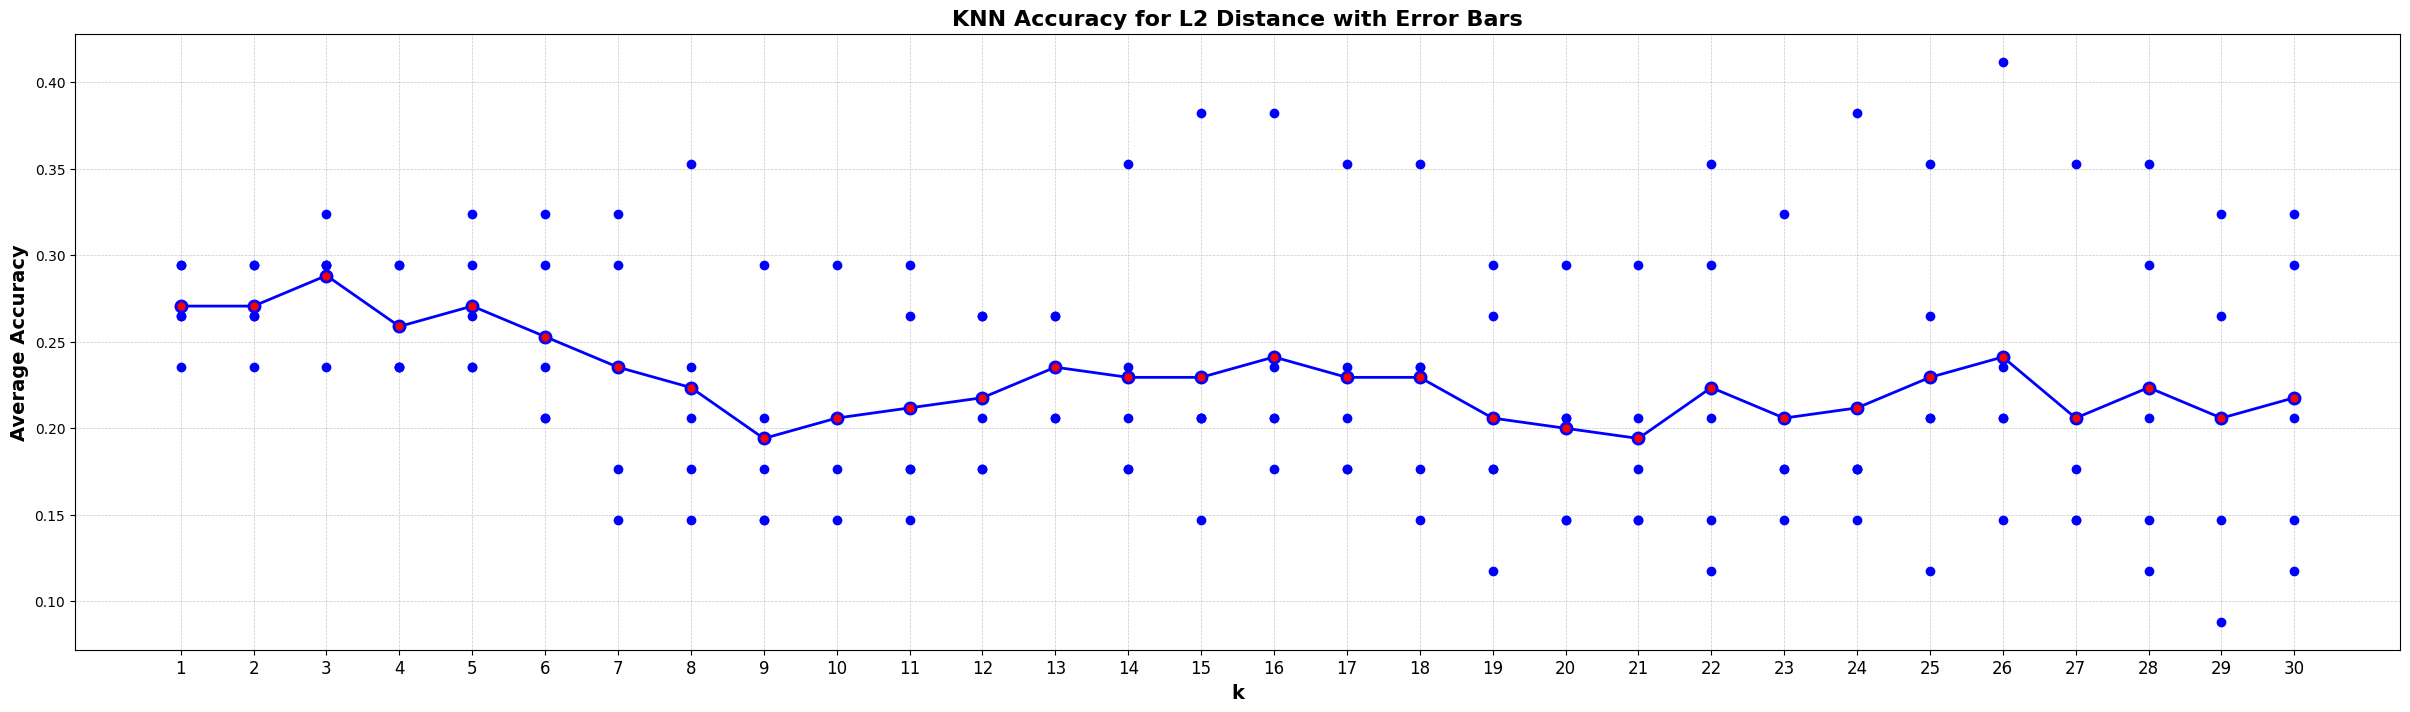

In [48]:
plt.figure(figsize=(30, 8))
i = 1
for k, fold_accuracies in euclidean_accuracies:
    plt.plot([k] * len(fold_accuracies), fold_accuracies, 'bo')
euclidean_mean_accuracies = []
euclidean_std_accuracies = []
for k, fold_accuracies in euclidean_accuracies:
    mean_acc = np.mean(fold_accuracies)

    euclidean_mean_accuracies.append(mean_acc)

plt.errorbar(k_values, euclidean_mean_accuracies, fmt='-o',
             color='b', markersize=8, markerfacecolor='red', markeredgewidth=2,
             ecolor='blue', elinewidth=2, capsize=5, linestyle='-', linewidth=2)


plt.title('KNN Accuracy for L2 Distance with Error Bars', fontsize=16, fontweight='bold')
plt.xlabel('k', fontsize=14, fontweight='bold')
plt.ylabel('Average Accuracy', fontsize=14, fontweight='bold')


plt.xticks(k_values, fontsize=12)


plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()

